# Інтервальне оцінювання параметрів гауссівських випадкових величин

## _Приклад і завдання_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

Документація:

https://docs.scipy.org/doc/scipy/reference/stats.html

https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html



### Задаємо обсяг вибірки, параметри розподілу Гаусса і генеруємо послідовність псевдовипадкових чисел

In [2]:
n = 1000  #обсяг вибірки

mean =  5  #математичне сподівання
stdev = 3  #середнє квадратичне відхилення

X = np.random.normal(mean, stdev, n) #генеруємо n псевдовипадкових чисел з нормальним розподілом


### Побудова довірчого інтервала для математичного сподівання за умови, що дисперсія невідома

In [3]:
# знаходимо точкові оцінки параметрів

m = X.mean() # точкова оцінка математичного сподівання
s = X.std(ddof=1) # точкова оцінка середнього квадратичного відхилення
# якщо потрібно оцінити дисперсію, то це можна зробити так:   X.var(ddof=1)

# будуємо довірчий інтервал

gamma = 0.95 #довірча ймовірність

kv = ss.t.ppf((1+gamma)/2, n-1) #квантиль t-розподілу Стьюдента з n-1 ступенями вільності

print(f'Точкова оцінка математичного сподівання =            {m:.3f}')
print(f'Точкова оцінка середнього квадратичного відхилення = {s:.3f}')

Точкова оцінка математичного сподівання =            4.933
Точкова оцінка середнього квадратичного відхилення = 3.038


In [4]:
L = m - kv*s/np.sqrt(n) # лівий кінець інтервалу 
R = m + kv*s/np.sqrt(n) # правий кінець інтервалу

print(f'Довірчий інтервал для математичного сподівання при невідомій дисперсії: [{L:.3f}, {R:.3f}]')

Довірчий інтервал для математичного сподівання при невідомій дисперсії: [4.744, 5.121]


### Отже, якщо маємо яку-небудь практичну задачу, то отримуємо результати спостережень (вибірку), і на її основі будуємо інтервальну оцінку математичного сподівання, як це було зроблено вище.

### Але довірчий інтервал - це випадковий інтервал (його кінці - випадкові величини), який накриває невідомий параметр із заданою наперед довірчою ймовірністю. Тому якщо у тій же задачі, за тих же умов отримати іншу вибірку (провівши ще одну серію вимірювань чи спостережень), то отримаємо вже іншу реалізацію такого інтервалу.

### Проведемо далі комп'ютерний експеримент, моделюючи 50 вибірок (по 1000 елементів) незалежних гауссівських випадкових величин і будуючи довірчі інтервали на основі кожної вибірки.

In [5]:
m_est = np.zeros(50)
Left = np.zeros(50); Right = np.zeros(50)

for i in range(50):
    X = np.random.normal(mean, stdev, n)
    m = X.mean(); s = X.std(ddof=1)
    m_est[i] = m  
    Left[i] = m - kv*s/np.sqrt(n); Right[i] = m + kv*s/np.sqrt(n) 
    

#### Візуалізуємо ці інтервали

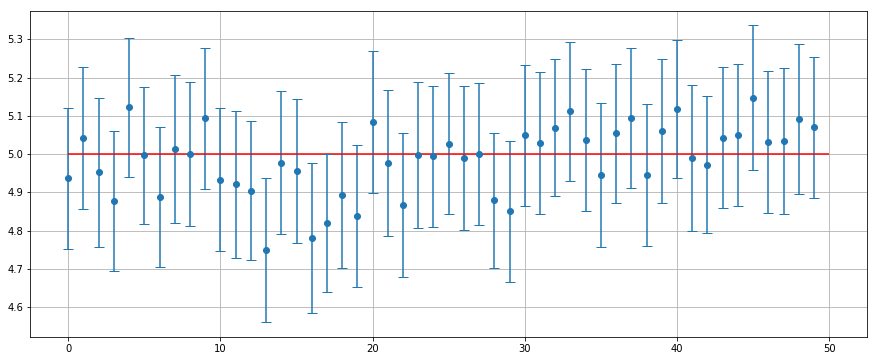

In [6]:
plt.figure(figsize=(15,6))
plt.grid()

count = np.arange(0,50)
int_err = [m_est-Left, Right-m_est]

plt.errorbar(count, m_est, yerr=int_err, fmt='o', capsize = 5) # див. посилання на документацію вище

plt.hlines(mean, 0, 50, colors = 'red')
            
'''
Отже, на рисунку, червоною лінією позначено математичне сподівання (тобто характеристика, яка оцінюється, на практиці - невідома),
візуалізовано 50 довірчих інтервалів, точками позначено точкові оцінки математичного сподівання
'''
plt.show()

##### Зверніть увагу, що деякі інтервали не накривають істинне значення математичного сподівання. Чому?
#### Проведіть кілька експериментів, змінюючи обсяг вибірки, довірчу ймовірність, інші параметри. Зробіть висновки.

## Далі зробіть те саме, що і в прикладі для задачі побудови:
* ## довірчого інтервалу для математичного сподівання гауссівської випадкової величини з відомою дисперсією, 
* ## довірчого інтервалу для дисперсії гауссівської випадкової величини з відомим математичним сподіванням,
* ## довірчого інтервалу для дисперсії гауссівської випадкової величини з невідомим математичним сподіванням.

## Результати оформіть у вигляді звіту. Не забудьте про висновки.